<span style="color: RoyalBlue; font-size: 18px;"> **1. Import**</span><br>
<span style="color: RoyalBlue; font-size: 14px;"> *Bibliotheken: pyschog, toml, pandas*</span><br>

In [ ]:
import psycopg
import toml
import pandas as pd

<span style="color: RoyalBlue; font-size: 18px;"> **2. Erstelle Datenbank 'wws'**</span><br>
<span style="color: RoyalBlue; font-size: 14px;"> *Einmaliger Code um Datenbank anzulegen*</span><br>

In [ ]:
try:
    secrets_db_create = toml.load("your project path")

    conn = psycopg.connect(
        host=secrets_db_create["connections"]["postgres"]["host"],
        port=secrets_db_create["connections"]["postgres"]["port"],
        dbname=secrets_db_create["connections"]["postgres"]["dbname"],
        user=secrets_db_create["connections"]["postgres"]["user"],
        password=secrets_db_create["connections"]["postgres"]["password"],
        autocommit=True
    )
    
    cur = conn.cursor()
    cur.execute("CREATE DATABASE wws")
    conn.commit()
    conn.close()

except psycopg.Error as e:
    print("Error:", e)



Error: Datenbank »wws« existiert bereits


<span style="color: RoyalBlue; font-size: 18px;"> **3. Connection neue DB und erstelle erste Tabelle**</span><br>
<span style="color: RoyalBlue; font-size: 14px;"> *Tabelle: Kunden*</span><br>

In [ ]:
try:
    secrets = toml.load("your project path")

    conn = psycopg.connect(
        host=secrets["connections"]["postgres"]["host"],
        port=secrets["connections"]["postgres"]["port"],
        dbname=secrets["connections"]["postgres"]["dbname"],
        user=secrets["connections"]["postgres"]["user"],
        password=secrets["connections"]["postgres"]["password"],
        autocommit=True
    )

    cur = conn.cursor()
    cur.execute("""
    CREATE TABLE IF NOT EXISTS Kunden (
    Customer_Id INT PRIMARY KEY,
    Vorname VARCHAR(50),
    Nachname VARCHAR(50) NOT NULL,
    Email VARCHAR(50),
    Telefon VARCHAR(30),
    Mobil VARCHAR (30),
    Erstellt TIMESTAMP,
    Anrede VARCHAR(10),
    PLZ VARCHAR(10),
    Ort VARCHAR(50),
    Strasse VARCHAR(100),
    Hausnummer VARCHAR(10)
);
""")
    conn.commit

except psycopg.Error as e:
    print("Error:", e)

<span style="color: RoyalBlue; font-size: 18px;"> **4. erstelle alle weiteren Tabellen**</span><br>
<span style="color: RoyalBlue; font-size: 14px;"> *Tabelle: Order, Payments, Produkte, Order_items*</span><br>

In [7]:
cur.execute("""
CREATE TABLE IF NOT EXISTS Produkte (
    Produkt_Id INT PRIMARY KEY,
    NAME VARCHAR(255),
    Produktbeschreibung VARCHAR(255),
    Preis NUMERIC(10,2),
    Lagerbestand INT,
    Kategorie_Id INT
);
""")
conn.commit

<bound method Connection.commit of <psycopg.Connection [IDLE] (host=localhost port=5433 user=postgres database=wws) at 0x155d7fc1d00>>

In [8]:
cur.execute("""
CREATE TABLE IF NOT EXISTS orders (
    Bestell_Id SERIAL PRIMARY KEY,
    Customer_id INT NOT NULL,
    Bestelldatum TIMESTAMP NOT NULL,
    Status VARCHAR(20) NOT NULL,
    Gesamtbetrag_der_Bestellung NUMERIC(10,2) NOT NULL
   
);
""")
conn.commit

<bound method Connection.commit of <psycopg.Connection [IDLE] (host=localhost port=5433 user=postgres database=wws) at 0x155d7fc1d00>>

In [9]:
cur.execute("""
CREATE TABLE IF NOT EXISTS order_items (
    Bestellartikel_ID INT PRIMARY KEY,
    Bestell_Id INT NOT NULL,
    Produkt_Id INT NOT NULL,
    Bestellte_Menge INT NOT NULL,
    Einzelpreis NUMERIC(10,2) NOT NULL
);
""")
conn.commit

<bound method Connection.commit of <psycopg.Connection [IDLE] (host=localhost port=5433 user=postgres database=wws) at 0x155d7fc1d00>>

In [10]:
cur.execute("""
CREATE TABLE IF NOT EXISTS payments (
    Zahlungs_Id INT PRIMARY KEY,
    Bestell_Id INT NOT NULL,
    Zahlungsdatum TIMESTAMP NOT NULL,
    Betrag NUMERIC(10,2) NOT NULL,
    Zahlungsmethode VARCHAR(30)
);
""")
conn.commit

<bound method Connection.commit of <psycopg.Connection [IDLE] (host=localhost port=5433 user=postgres database=wws) at 0x155d7fc1d00>>

<span style="color: RoyalBlue; font-size: 18px;"> **5. Teste Tabelle**</span><br>

In [13]:
#Test 
cur.execute('SELECT* FROM Kunden;')
cur.fetchall()
df_test = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])
print(df_test.head(0))


Empty DataFrame
Columns: [customer_id, vorname, nachname, email, telefon, mobil, erstellt, anrede, plz, ort, strasse, hausnummer]
Index: []


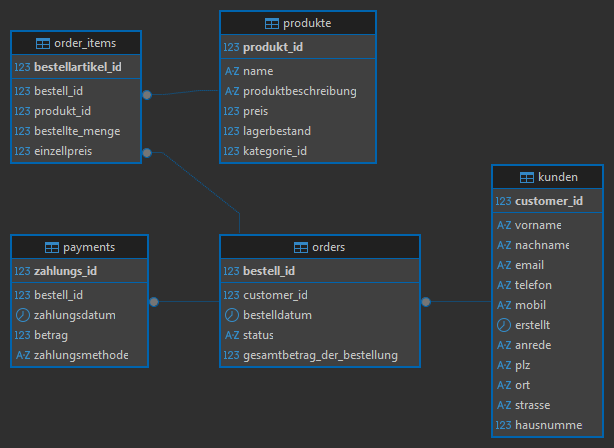

<span style="color: RoyalBlue; font-size: 18px;"> **5. Erstelle Fremdschlüssel**</span><br>

<span style="color: RoyalBlue; font-size: 14px;"> **FS: customer_id | Table: orders <-> Kunden**</span><br>

In [35]:
try: 
    cur.execute("ALTER TABLE orders ADD CONSTRAINT fk_customer_id FOREIGN KEY (customer_id) REFERENCES Kunden (customer_id)")

except psycopg.errors.DuplicateObject as e:
    print("Fremdschlüssel ist schon da - \nERROR:",e)

Fremdschlüssel ist schon da - 
ERROR: Constraint »fk_customer_id« existiert bereits für Relation »orders«


<span style="color: RoyalBlue; font-size: 14px;"> **FS: bestell_id | Table: payments <-> orders**</span><br>

In [36]:
try: 
    cur.execute("ALTER TABLE payments ADD CONSTRAINT fk_bestell_id FOREIGN KEY (bestell_id) REFERENCES orders (bestell_id)")

except psycopg.errors.DuplicateObject as e:
    print("Fremdschlüssel ist schon da - \nERROR:",e)

Fremdschlüssel ist schon da - 
ERROR: Constraint »fk_bestell_id« existiert bereits für Relation »payments«


<span style="color: RoyalBlue; font-size: 14px;"> **FS: bestell_id | Table: order_items <-> orders**</span><br>

In [37]:
try: 
    cur.execute("ALTER TABLE order_items ADD CONSTRAINT fk_bestell_id_2 FOREIGN KEY (bestell_id) REFERENCES orders (bestell_id)")

except psycopg.errors.DuplicateObject as e:
    print("Fremdschlüssel ist schon da - \nERROR:",e)

Fremdschlüssel ist schon da - 
ERROR: Constraint »fk_bestell_id_2« existiert bereits für Relation »order_items«


<span style="color: RoyalBlue; font-size: 14px;"> **FS: produkt_id | Table: order_items <-> produkte**</span><br>

In [38]:
try: 
    cur.execute("ALTER TABLE order_items ADD CONSTRAINT fk_produkt_id FOREIGN KEY (produkt_id) REFERENCES produkte (produkt_id)")

except psycopg.errors.DuplicateObject as e:
    print("Fremdschlüssel ist schon da - \nERROR:",e)

Fremdschlüssel ist schon da - 
ERROR: Constraint »fk_produkt_id« existiert bereits für Relation »order_items«


<span style="color: RoyalBlue; font-size: 18px;"> **6. Füge Testdaten in die Tabellen**</span><br>
<span style="color: RoyalBlue; font-size: 14px;"> **Dataframes über csv erzeugen**</span><br>

In [ ]:
try:
    df_customer = pd.read_csv("your file path", sep=';')
    df_order_items = pd.read_csv("your file path", sep=';')
    df_orders = pd.read_csv("your file path", sep=';')
    df_payments = pd.read_csv("your file path", sep=';')
    df_produkte = pd.read_csv("your file path", sep=';')

except FileNotFoundError as e:
    print("Datei nicht gefunden:", e)
except pd.errors.ParserError as e:
    print("Fehler beim einlesen, prüfe csv Inhalt:", e)

<span style="color: RoyalBlue; font-size: 14px;"> **DataFrame in Tupels umwandeln**</span><br>

In [20]:
try:
    df_customer_tupels = list(df_customer.itertuples(index=False, name=None))
    df_order_items_tupels = list(df_order_items.itertuples(index=False, name=None)) 
    df_orders_tupels = list(df_orders.itertuples(index=False, name=None))
    df_payment_tupels = list(df_payments.itertuples(index=False, name=None)) 
    df_produkte_tupels = list(df_produkte.itertuples(index=False, name=None))
    
except Exception as e:
    print(e)
    print('Fehler bei der Iteration der Tuples')
 

<span style="color: RoyalBlue; font-size: 14px;"> **Tabelle Kunde - Daten aus CSV einfügen** <br> 

In [21]:
# Abruf der Spaltennamen aus der Tabelle Kunden
cur.execute("SELECT * FROM Kunden LIMIT 1;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

['customer_id', 'vorname', 'nachname', 'email', 'telefon', 'mobil', 'erstellt', 'anrede', 'plz', 'ort', 'strasse', 'hausnummer']


In [ ]:
#Werte in die Tabelle Kunden einfügen mit den angegebenen Spalten

sql = """
INSERT INTO Kunden (customer_id, Anrede, Vorname , Nachname, PLZ, Ort, Strasse, Hausnummer, Telefon, Email, Mobil, Erstellt)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

cur.executemany(sql, df_customer_tupels)
conn.commit()


<span style="color: RoyalBlue; font-size: 14px;"> **Tabelle Orders - Daten aus CSV einfügen** <br> 

In [22]:
# Abruf der Spaltennamen aus der Tabelle Orders
cur.execute("SELECT * FROM Orders LIMIT 1;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

['bestell_id', 'customer_id', 'bestelldatum', 'status', 'gesamtbetrag_der_bestellung']


In [ ]:
# Werte in die Tabelle order items einfügen mit den angegebenen Spalten
#Anzahl der Spalten in jedem Tupel muss exakt zu den Platzhaltern passen
sql_orders = """
INSERT INTO orders (Customer_id, Bestell_Id, Bestelldatum, Status, Gesamtbetrag_der_Bestellung) 
VALUES (%s, %s, %s, %s, %s)
;
"""

cur.executemany(sql_orders, df_orders_tupels)

<span style="color: RoyalBlue; font-size: 14px;"> **Tabelle Payments - Daten aus CSV einfügen** <br> 

In [23]:
# Abruf der Spaltennamen aus der Tabelle Payments
cur.execute("SELECT * FROM Payments LIMIT 1;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

['zahlungs_id', 'bestell_id', 'zahlungsdatum', 'betrag', 'zahlungsmethode']


In [ ]:
# Werte in die Tabelle orders einfügen mit den angegebenen Spalten

sql_payments = """
INSERT INTO payments (Zahlungs_Id, Bestell_Id, Zahlungsdatum, Betrag, Zahlungsmethode)
VALUES ( %s, %s, %s, %s, %s)
;
"""


cur.executemany(sql_payments, df_payment_tupels)

<span style="color: RoyalBlue; font-size: 14px;"> **Tabelle Produkte - Daten aus CSV einfügen** <br> 

In [24]:
# Abruf der Spaltennamen aus der Tabelle Produkte
cur.execute("SELECT * FROM Produkte LIMIT 1;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

['produkt_id', 'name', 'produktbeschreibung', 'preis', 'lagerbestand', 'kategorie_id']


In [ ]:
# Werte in die Tabelle orders einfügen mit den angegebenen Spalten

sql_produkte = """
INSERT INTO Produkte (Produkt_Id, Name, Produktbeschreibung, Preis, Lagerbestand, Kategorie_Id)
VALUES ( %s, LEFT(%s,255), LEFT(%s,255), %s, %s, %s)
;
"""


cur.executemany(sql_produkte, df_produkte_tupels)

<span style="color: RoyalBlue; font-size: 14px;"> **Tabelle Order_items - Daten aus CSV einfügen** <br> 

In [25]:
# Abruf der Spaltennamen aus der Tabelle Order_items
cur.execute("SELECT * FROM Order_items LIMIT 1;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

['bestellartikel_id', 'bestell_id', 'produkt_id', 'bestellte_menge', 'einzelpreis']


In [ ]:
# Werte in die Tabelle orders einfügen mit den angegebenen Spalten

sql_order_items = """
INSERT INTO order_items (Bestellartikel_Id, Bestell_Id, Produkt_Id, Bestellte_Menge, Einzelpreis)
VALUES (%s, %s, %s, %s, %s)
;
"""

cur.executemany(sql_order_items, df_order_items_tupels)

In [31]:
#Test
cur.execute("SELECT * FROM orders;")
rows = cur.fetchall()[0:15]
for row in rows:
    print(row)

(7800174, 1, datetime.datetime(2025, 7, 3, 21, 28), 'offen', Decimal('50.20'))
(7800175, 2, datetime.datetime(2025, 7, 16, 5, 58), 'offen', Decimal('21.90'))
(7800176, 3, datetime.datetime(2025, 5, 12, 6, 7), 'offen', Decimal('17.99'))
(7800177, 4, datetime.datetime(2025, 6, 8, 6, 18), 'In Bearbeitung', Decimal('70.80'))
(7800178, 5, datetime.datetime(2025, 5, 11, 23, 16), 'In Bearbeitung', Decimal('89.80'))
(7800179, 6, datetime.datetime(2025, 6, 21, 11, 38), 'offen', Decimal('17.10'))
(7800180, 7, datetime.datetime(2025, 7, 4, 11, 20), 'offen', Decimal('70.81'))
(7800181, 8, datetime.datetime(2025, 6, 23, 13, 31), 'offen', Decimal('199.90'))
(7800182, 9, datetime.datetime(2025, 6, 8, 11, 30), 'In Bearbeitung', Decimal('259.99'))
(7800183, 10, datetime.datetime(2025, 5, 9, 23, 7), 'In Bearbeitung', Decimal('108.50'))
(7800184, 11, datetime.datetime(2025, 6, 9, 8, 28), 'offen', Decimal('108.60'))
(7800185, 12, datetime.datetime(2025, 6, 2, 21, 20), 'offen', Decimal('999.99'))
(7800186,

In [32]:
# Schließe die Verbindung
cur.close()      
conn.close()  